In [51]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from utils import *


In [52]:
df = pd.read_csv('diabetes_scaled.txt', sep=' ', header=None).drop(columns=[9]).dropna()
Y = df.loc[:, 0].to_numpy()
Y = np.where(Y == -1, 0, Y)
unique = np.unique(Y, return_counts=True)
print(unique)

(array([0, 1], dtype=int64), array([263, 496], dtype=int64))


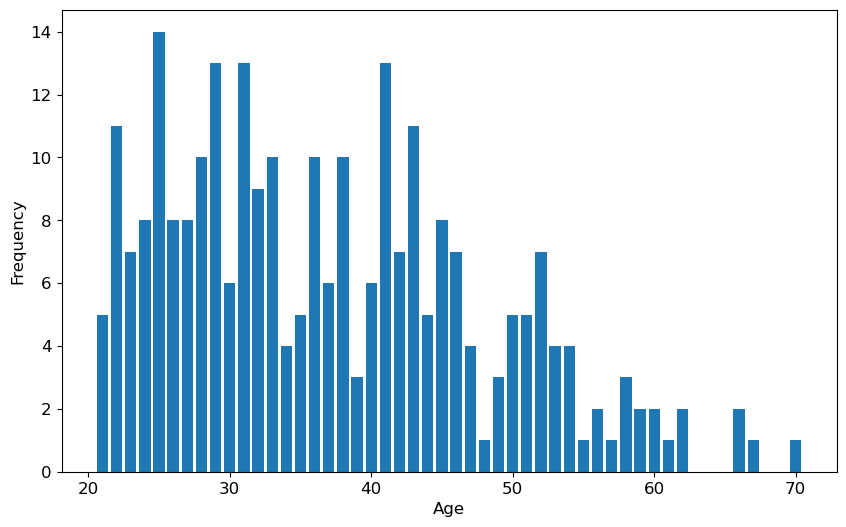

In [35]:
# Positive case distribution

x = df.loc[df['Outcome']==1]['Age'].value_counts().index
y = df.loc[df['Outcome']==1]['Age'].value_counts().values

plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [64]:
df_scaled = pd.read_csv('diabetes_scaled.txt', sep=' ', header=None).drop(columns=[9])
label = df_scaled.loc[:, 0].to_numpy()
fn_1 = lambda x: x.str[2:].astype('float32')
df_scaled = df_scaled.loc[:, 1:].apply(fn_1, axis=1)
X = df_scaled.to_numpy()
Y = label



from torch.utils.data import Dataset, DataLoader
class CustomDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = {
            'data': self.data[idx],
            'target': self.targets[idx]
        }
        return sample



custom_dataset = CustomDataset(X, Y)
batch_size = 16
custom_dataloader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)


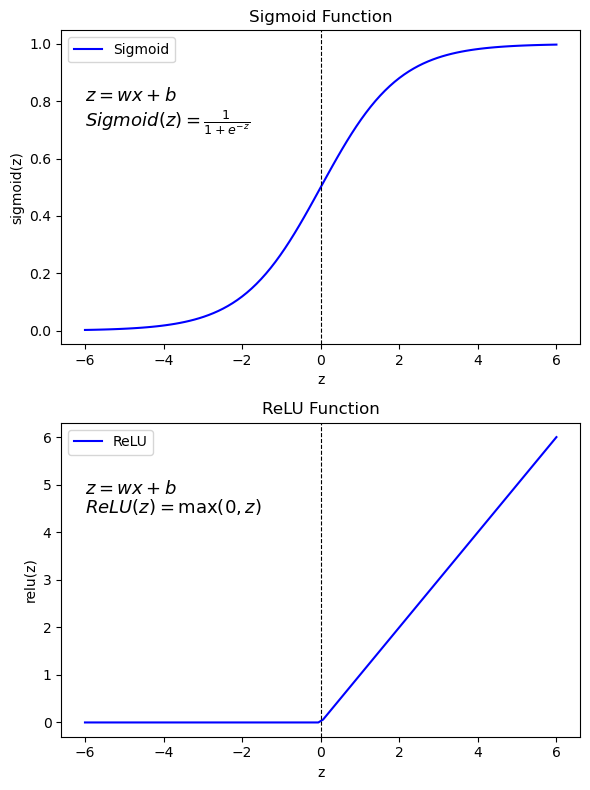

In [34]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-6, 6, 100)
sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))



# Plot the sigmoid function
ax1.plot(x, sigmoid, label='Sigmoid', color='blue')
ax1.axvline(0, color='black', linestyle='--', linewidth=0.8)
ax1.text(-6, 0.8, r'$z = wx + b$', fontsize=13, color='black') 
ax1.text(-6, 0.71, r'$Sigmoid(z) = \frac{1}{1 + e^{-z}}$', fontsize=13, color='black')
ax1.set_title('Sigmoid Function')
ax1.set_xlabel('z')
ax1.set_ylabel('sigmoid(z)')
ax1.legend()

# Plot the ReLU function
ax2.plot(x, relu, label='ReLU', color='blue')
ax2.axvline(0, color='black', linestyle='--', linewidth=0.8)
ax2.text(-6, 4.8, r'$z = wx + b$', fontsize=13, color='black') 
ax2.text(-6, 4.4, r'$ReLU(z) = \max(0, z)$', fontsize=13, color='black')
ax2.set_title('ReLU Function')
ax2.set_xlabel('z')
ax2.set_ylabel('relu(z)')
ax2.legend()

plt.tight_layout()
plt.show()


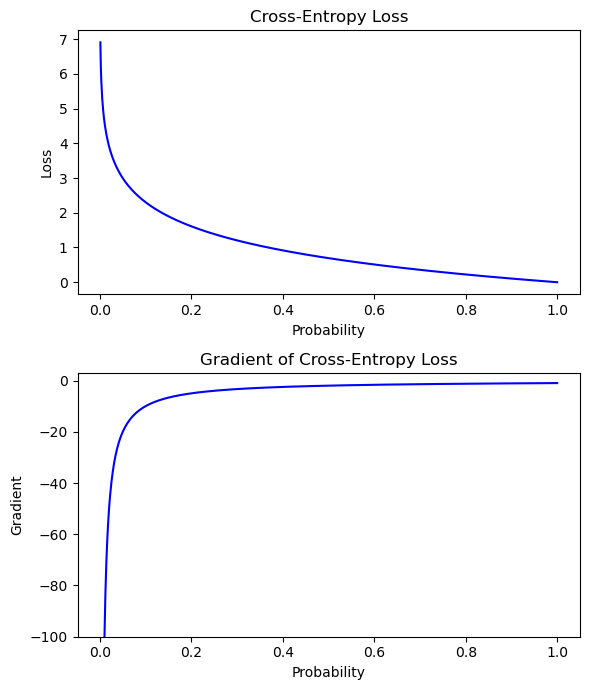

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cross-entropy loss function
def cross_entropy_loss(probs):
    return -np.log(probs)

# Define the gradient of the cross-entropy loss function
def gradient_cross_entropy_loss(probs):
    return -1/probs

pred_probs = np.arange(0.001, 1.001, 0.001)
loss_values = cross_entropy_loss(pred_probs)
gradient_values = gradient_cross_entropy_loss(pred_probs)

# Create a figure with two vertically stacked subplots
plt.figure(figsize=(6, 7))

# Create the plot for the loss
plt.subplot(211)
plt.plot(pred_probs, loss_values, label='Cross-Entropy Loss', color='blue')
plt.xlabel('Probability')
plt.ylabel('Loss')
plt.title('Cross-Entropy Loss')


# Create the plot for the gradient
plt.subplot(212)
plt.plot(pred_probs, gradient_values, label='Gradient', color='blue')
plt.xlabel('Probability')
plt.ylabel('Gradient')
plt.ylim(-100, 3)
plt.title('Gradient of Cross-Entropy Loss')


plt.tight_layout()
plt.show()



# Result Plots

## Confusion matrix

In [8]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from classifier import *
from utils import *
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
import joblib

test_X = torch.tensor(np.load('./models/test_X.npy'))
test_Y = torch.tensor(np.load('./models/test_Y.npy'))



model_SLP = SinglePerceptron(test_X.shape[1])
model_SLP.load_state_dict(torch.load('./models/model_SLP.pth'))
model_SLP.to('cpu')
model_SLP.eval()


model_MLP_V1 = MLP_V1(test_X.shape[1])
model_MLP_V1.load_state_dict(torch.load('./models/model_MLP_V1.pth'))
model_MLP_V1.to('cpu')
model_MLP_V1.eval()


model_MLP_V2 = MLP_V2(test_X.shape[1])
model_MLP_V2.load_state_dict(torch.load('./models/model_MLP_V2.pth'))
model_MLP_V2.to('cpu')
model_MLP_V2.eval()

model_SVM = joblib.load('./models/SVM_model.pkl')
model_RF = joblib.load('./models/RF_model.pkl')

OrderedDict
_rebuild_tensor_v2
OrderedDict
_rebuild_tensor_v2
OrderedDict
_rebuild_tensor_v2


In [46]:
test_Y

tensor([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 1, 1, 0])

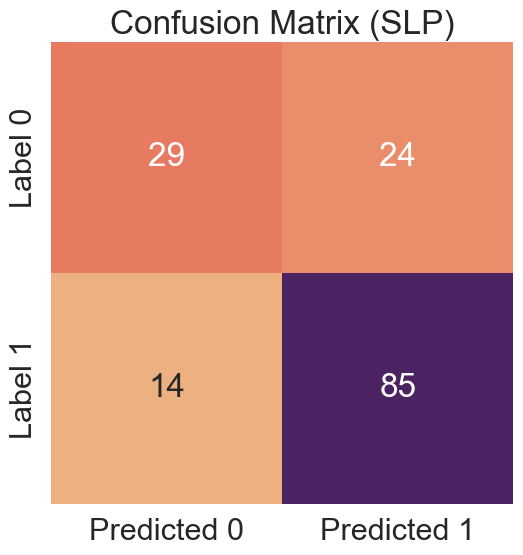

In [37]:
with torch.no_grad():
    y_pred_SLP = model_SLP(test_X)
    y_pred_SLP = torch.round(y_pred_SLP)
    
cm = confusion_matrix(test_Y, y_pred_SLP)
plt.figure(figsize=(6, 6))
sns.set(font_scale=2)
sns.heatmap(cm, annot=True, fmt="d", cmap="flare", cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Label 0", "Label 1"])
plt.title('Confusion Matrix (SLP)')
plt.show()

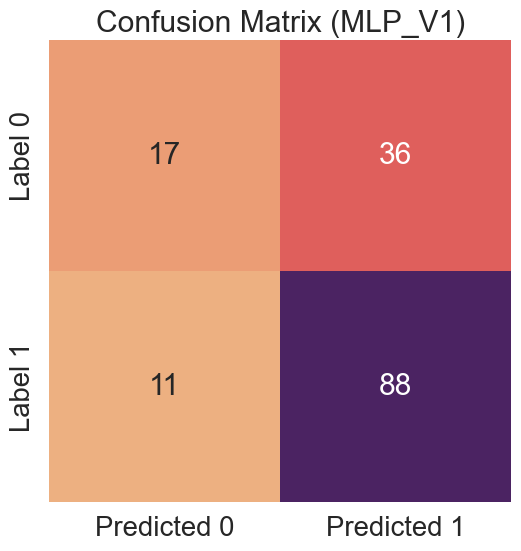

In [35]:
with torch.no_grad():
    y_pred_V1 = model_MLP_V1(test_X)
    y_pred_V1 = torch.round(y_pred_V1)
    
cm = confusion_matrix(test_Y, y_pred_V1)
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.8)
sns.heatmap(cm, annot=True, fmt="d", cmap="flare", cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Label 0", "Label 1"])
plt.title('Confusion Matrix (MLP_V1)')
plt.show()

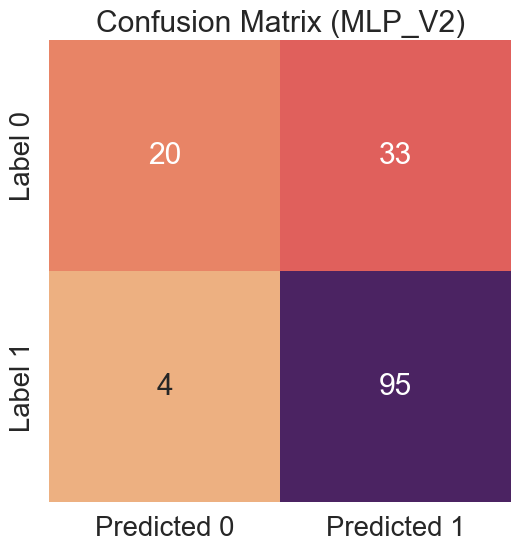

In [34]:
with torch.no_grad():
    y_pred_V2 = model_MLP_V2(test_X)
    y_pred_V2 = torch.round(y_pred_V2)

cm = confusion_matrix(test_Y, y_pred_V2)
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.8)
sns.heatmap(cm, annot=True, fmt="d", cmap="flare", cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Label 0", "Label 1"])
plt.title('Confusion Matrix (MLP_V2)')
plt.show()

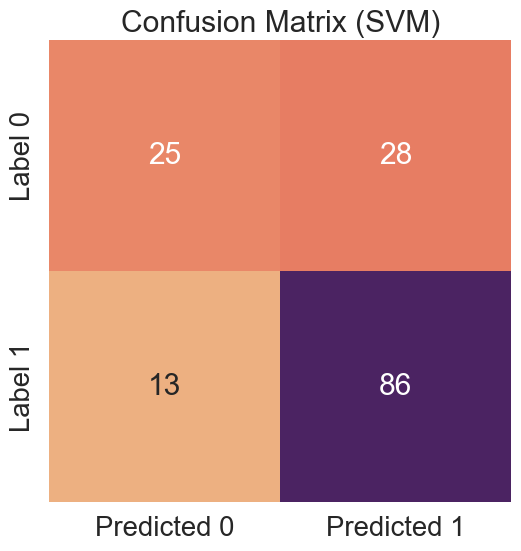

In [14]:

y_pred_SVM = model_SVM.predict(test_X)
y_pred_SVM = np.round(y_pred_SVM)
    
cm = confusion_matrix(test_Y, y_pred_SVM)
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.8)
sns.heatmap(cm, annot=True, fmt="d", cmap="flare", cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Label 0", "Label 1"])
plt.title('Confusion Matrix (SVM)')
plt.show()

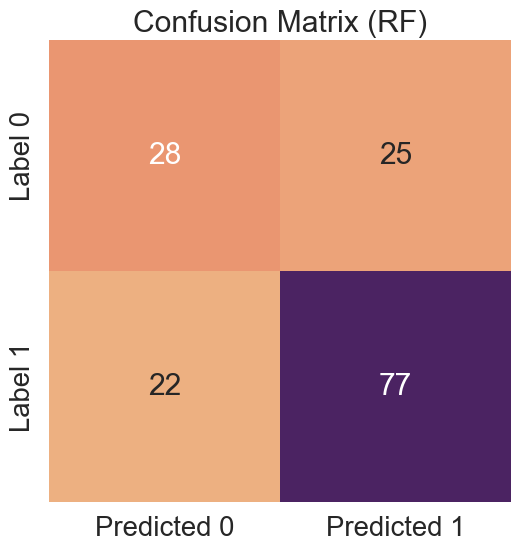

In [16]:
y_pred_RF = model_RF.predict(test_X)
y_pred_RF = np.round(y_pred_RF)

cm = confusion_matrix(test_Y, y_pred_RF)
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.8)
sns.heatmap(cm, annot=True, fmt="d", cmap="flare", cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Label 0", "Label 1"])
plt.title('Confusion Matrix (RF)')
plt.show()

## AUC_ROC plots

C:\Users\Zheng Liangwei\AppData\Local\Temp\ipykernel_6792\3464990770.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_X = torch.tensor(test_X)


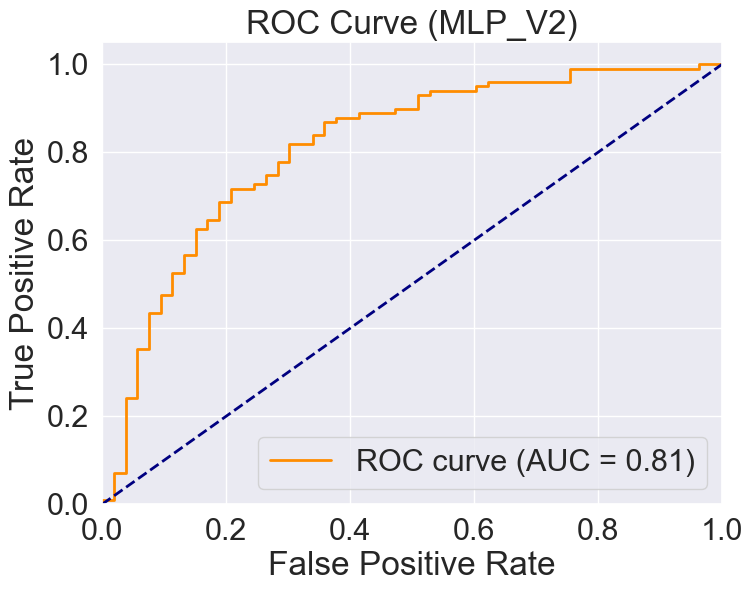

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


test_X = torch.tensor(test_X)

with torch.no_grad():
    y_pred_V2 = model_MLP_V2(test_X)

fpr, tpr, _ = roc_curve(test_Y, y_pred_V2)
roc_auc = auc(fpr, tpr)


# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (MLP_V2)')
plt.legend(loc='lower right')
plt.show()

C:\Users\Zheng Liangwei\AppData\Local\Temp\ipykernel_6792\88101049.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_X = torch.tensor(test_X)


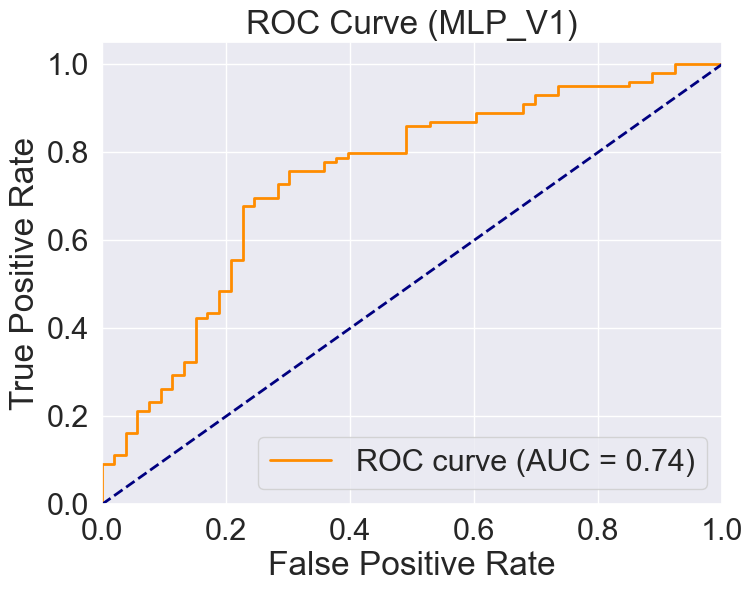

In [41]:
test_X = torch.tensor(test_X)

with torch.no_grad():
    y_pred_V1 = model_MLP_V1(test_X)

fpr, tpr, _ = roc_curve(test_Y, y_pred_V1)
roc_auc = auc(fpr, tpr)


# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (MLP_V1)')
plt.legend(loc='lower right')
plt.show()

C:\Users\Zheng Liangwei\AppData\Local\Temp\ipykernel_6792\2000618863.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_X = torch.tensor(test_X)


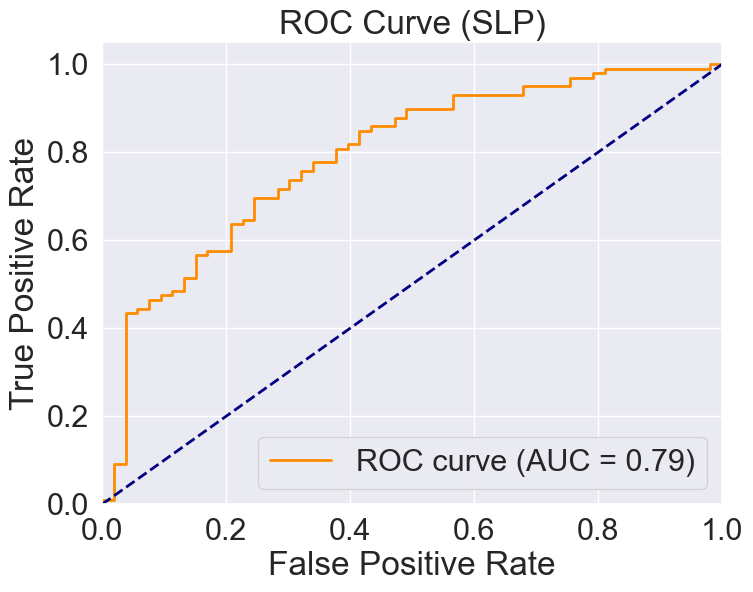

In [40]:
test_X = torch.tensor(test_X)

with torch.no_grad():
    y_pred_SLP = model_SLP(test_X)

fpr, tpr, _ = roc_curve(test_Y, y_pred_SLP)
roc_auc = auc(fpr, tpr)


# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SLP)')
plt.legend(loc='lower right')
plt.show()

## Train and Test plot